## **Bibliotecas**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import json
from functools import reduce
%matplotlib inline

## **Estilos**

https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [2]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.transparent'] = True

## Importando resultados

In [3]:
greedy = pd.read_json(os.path.join('..','results','result_greedy.json')).T

In [4]:
def get_values(grasp, key):
    all_values = []
    for instancia in instancias:
        all_values.append(list(grasp[instancia][key].values()))
    temp = []
    for list_value in all_values:
        temp += list_value
    return temp

In [5]:
with open(os.path.join('..','results','result_GRASP.json')) as file:
    grasp = json.loads(file.read())

In [6]:
instancias = ['input1.in','input2.in', 'input3.in', 'input4.in', 'input5.in', 'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in', 'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in', 'input16.in']
janelas = ['Janela - 2','Janela - 3','Janela - 4','Janela - 5','Janela - 6','Janela - 7','Janela - 8','Janela - 9']
col = ['Máx Iterações - 10', 'Máx Iterações - 100', 'Máx Iterações - 1000', 'Máx Iterações - 10000']

In [7]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [8]:
df['Máx Iterações - 10'] = get_values(grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(grasp,'Máx Iterações - 10000')

In [9]:
grasp = df

In [10]:
exact = pd.read_json(os.path.join('..','results','result_exact.json')).T

# Escolhendo melhor iteração e janela - GRASP

Text(0, 0.5, 'Resultado')

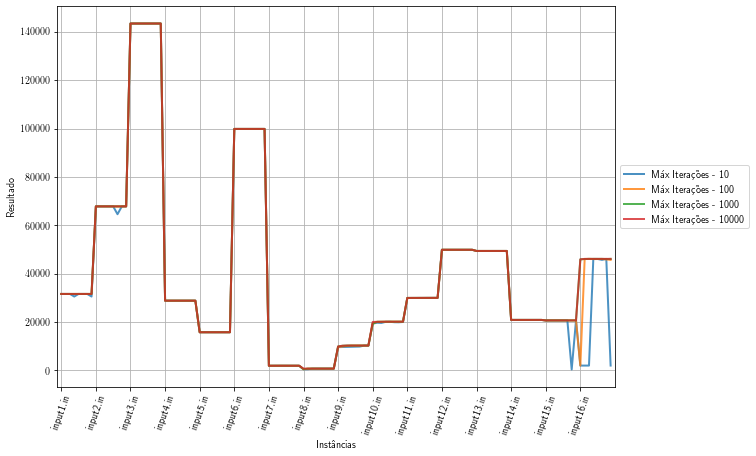

In [11]:
grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
plt.axis(xmin=-1, xmax=len(grasp.index))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')

In [12]:
gap_grasp = grasp.copy()

In [13]:
index_exact = 0
for i in range(len(gap_grasp)):
    if i!=0 and i%8 == 0:
        index_exact = index_exact + 1
    gap_grasp.iloc[i] = ((exact.loc[exact.index[index_exact]].values[0]-gap_grasp.iloc[i])/exact.loc[exact.index[index_exact]].values[0])*100

Text(0, 0.5, 'GAP')

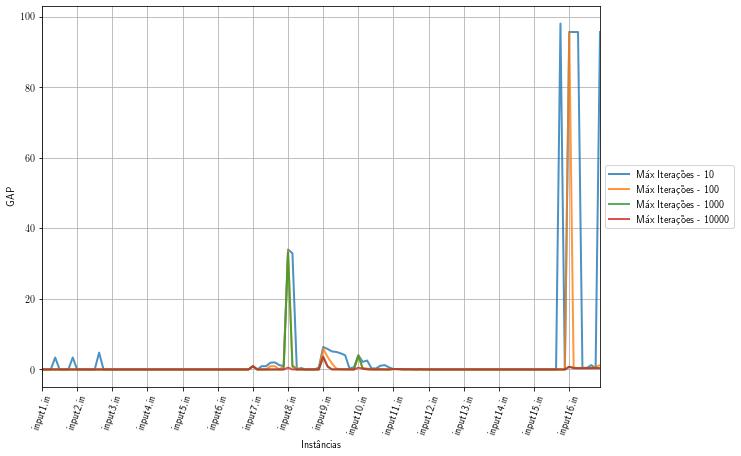

In [14]:
gap_grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('GAP')
# plt.savefig(os.path.join('..','imgs/')+'gap_all_grasp.pdf', bbox_inches='tight', transparent=True)

In [15]:
gap_grasp.mean()

Máx Iterações - 10       4.811709
Máx Iterações - 100      1.217037
Máx Iterações - 1000     0.370746
Máx Iterações - 10000    0.080223
dtype: float64

Text(0, 0.5, 'GAP médio')

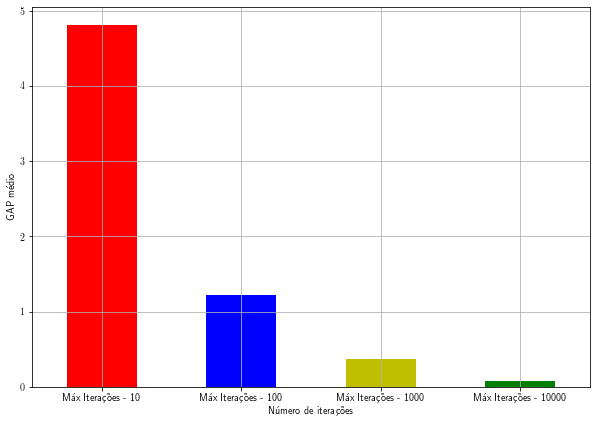

In [16]:
gap_grasp.mean().plot.bar(color=['r','b','y','g'])
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
plt.xlabel('Número de iterações')
plt.ylabel('GAP médio')

In [17]:
grasp = grasp[['Máx Iterações - 1000']]

In [20]:
all_windows_ocurr = []
for inst in instancias:
    ocurr = np.where(grasp.loc[inst].values == grasp.loc[inst].values.max())[0]
    all_windows_ocurr += list(ocurr)

In [21]:
best_window = 0
for i in range(len(janelas)):
    if all_windows_ocurr.count(i) > best_window:
        best_window = all_windows_ocurr.count(i)
        best_arange = [i,best_window]

In [22]:
best_arange #index 5 = janela 7

[5, 16]

In [23]:
gap_grasp = grasp.xs('Janela - 7',axis=0,level="Janelas")

In [24]:
gap_grasp.index.name = ""
gap_grasp.columns = ["GRASP"]

In [25]:
grasp = gap_grasp

## **Escolhendo melhor resultado guloso**

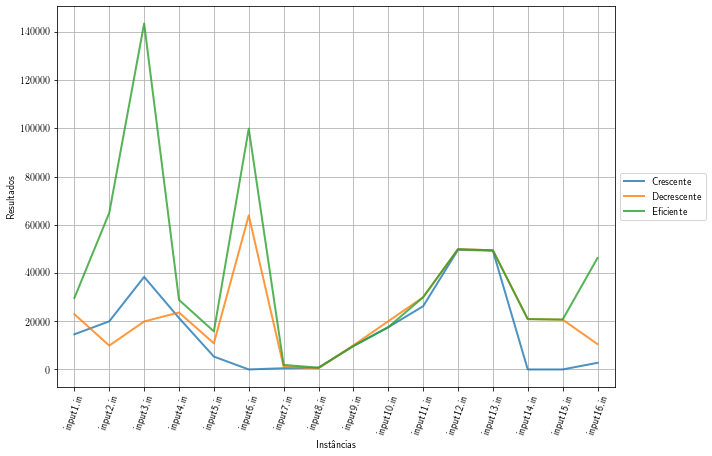

In [26]:
greedy.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(greedy.index)), list(greedy.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(greedy.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

In [27]:
gap_greedy = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, greedy.values, exact.values)), columns=greedy.columns, index=greedy.index)

Text(0, 0.5, 'GAP médio')

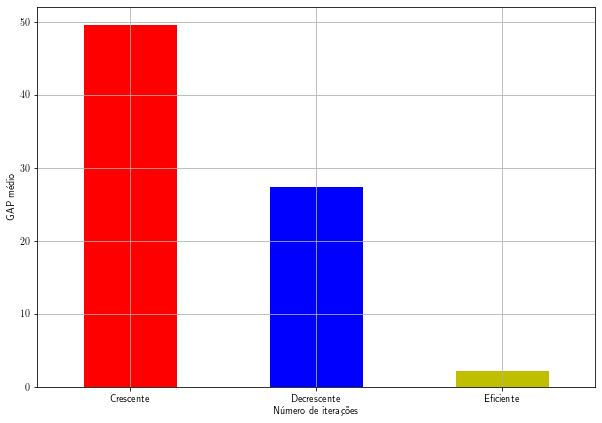

In [28]:
gap_greedy.mean().plot.bar(color=['r','b','y'])
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=0)
plt.xlabel('Número de iterações')
plt.ylabel('GAP médio')

## Comparação das Heurísticas

In [30]:
greedy.drop(["Crescente", "Decrescente"], axis=1, inplace=True)

In [31]:
results = pd.concat([greedy, grasp], sort=False, axis=1)

Text(0, 0.5, 'Resultados')

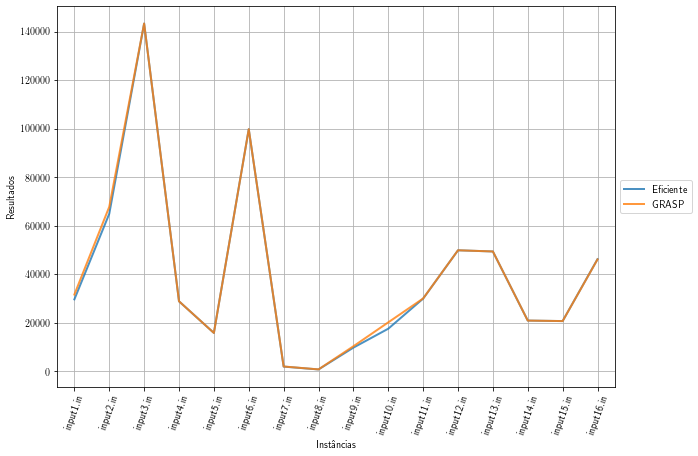

In [32]:
results.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultados')
# plt.savefig(os.path.join('..','imgs/')+'heuristics_compare.pdf', bbox_inches='tight', transparent=True)

## **Adicionando os resultados exatos**

In [33]:
results = pd.concat([results, exact], sort=False, axis=1)

Text(0, 0.5, 'Resultado')

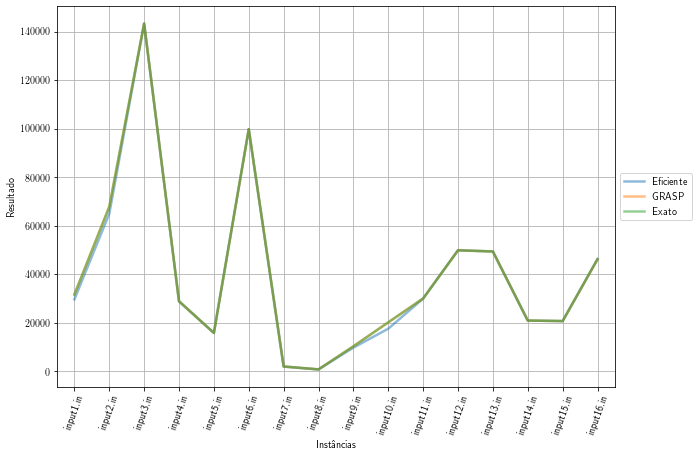

In [34]:
results.plot(lw=2.5, alpha=0.5, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
# plt.savefig(os.path.join('..','imgs/')+'exact_compare.pdf', bbox_inches='tight', transparent=True)

## **Cálculo do GAP**

In [35]:
results.drop(["Exato"],axis=1,inplace=True)

In [36]:
gap = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, results.values, exact.values)), columns=results.columns, index=results.index)

In [37]:
gap

,Eficiente,GRASP
,,
input1.in,6.277474,0.000000
input2.in,4.260714,0.000000
input3.in,0.000000,0.000000
input4.in,0.000000,0.000000
input5.in,0.000000,0.000000
input6.in,0.000000,0.000000
input7.in,2.371134,0.000000
input8.in,3.643725,0.000000
input9.in,5.485848,0.000000


In [38]:
gap.mean()

Eficiente    2.213083
GRASP        0.022221
dtype: float64

# **TEMPO DE EXECUÇÃO**

In [39]:
time_greedy = pd.read_json(os.path.join('..','results','time_greedy.json')).T

In [40]:
time_greedy.drop(["Crescente", "Decrescente"], axis=1, inplace=True)

In [41]:
time_greedy

,Eficiente
input1.in,0.000049
input2.in,0.000045
input3.in,0.000059
input4.in,0.000049
input5.in,0.000087
input6.in,0.000148
input7.in,0.000224
input8.in,0.000289
input9.in,0.000795
input10.in,0.000086


In [42]:
with open(os.path.join('..','results','time_GRASP.json')) as file:
    time_grasp = json.loads(file.read())

In [43]:
instancias = ['input1.in','input2.in', 'input3.in', 'input4.in', 'input5.in', 'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in', 'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in', 'input16.in']
janelas = ['Janela - 2','Janela - 3','Janela - 4','Janela - 5','Janela - 6','Janela - 7','Janela - 8','Janela - 9']
col = ['Máx Iterações - 10', 'Máx Iterações - 100', 'Máx Iterações - 1000', 'Máx Iterações - 10000']

In [44]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [45]:
df['Máx Iterações - 10'] = get_values(time_grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(time_grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(time_grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(time_grasp,'Máx Iterações - 10000')

In [46]:
time_grasp = df

In [47]:
time_grasp = df.xs(key="Janela - 7", axis=0, level="Janelas")[["Máx Iterações - 10000"]]

In [48]:
time_grasp.index.name = ""
time_grasp.columns = ["GRASP"]

In [49]:
time_grasp

,GRASP
,
input1.in,0.658577
input2.in,1.268119
input3.in,1.793519
input4.in,1.961441
input5.in,2.920281
input6.in,7.300090
input7.in,8.924300
input8.in,14.545534
input9.in,19.931664


In [50]:
with open(os.path.join('..','results','time_GRASP.json')) as file:
    time_grasp = json.loads(file.read())

In [51]:
instancias = ['input1.in','input2.in', 'input3.in', 'input4.in', 'input5.in', 'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in', 'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in', 'input16.in']
janelas = ['Janela - 2','Janela - 3','Janela - 4','Janela - 5','Janela - 6','Janela - 7','Janela - 8','Janela - 9']
col = ['Máx Iterações - 10', 'Máx Iterações - 100', 'Máx Iterações - 1000', 'Máx Iterações - 10000']

In [52]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [53]:
df['Máx Iterações - 10'] = get_values(time_grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(time_grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(time_grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(time_grasp,'Máx Iterações - 10000')

In [54]:
time_grasp = df

In [55]:
time_grasp = df.xs(key="Janela - 7", axis=0, level="Janelas")[["Máx Iterações - 1000"]]

In [56]:
time_grasp.index.name = ""
time_grasp.columns = ["GRASP"]

In [57]:
time_grasp

,GRASP
,
input1.in,0.066000
input2.in,0.123966
input3.in,0.225308
input4.in,0.200993
input5.in,0.292778
input6.in,0.727401
input7.in,0.891096
input8.in,1.454202
input9.in,1.990940


In [58]:
time_exact = pd.read_json(os.path.join('..','results','time_exact.json')).T

In [59]:
time = pd.concat([time_greedy, time_grasp, time_exact], sort=False, axis=1)

In [60]:
time

,Eficiente,GRASP,Exato
,,,
input1.in,0.000049,0.066000,0.296650
input2.in,0.000045,0.123966,0.826595
input3.in,0.000059,0.225308,1.984176
input4.in,0.000049,0.200993,2.038222
input5.in,0.000087,0.292778,2.175779
input6.in,0.000148,0.727401,32.647422
input7.in,0.000224,0.891096,0.589077
input8.in,0.000289,1.454202,0.389751
input9.in,0.000795,1.990940,12.474079


Text(0, 0.5, 'Tempo/s')

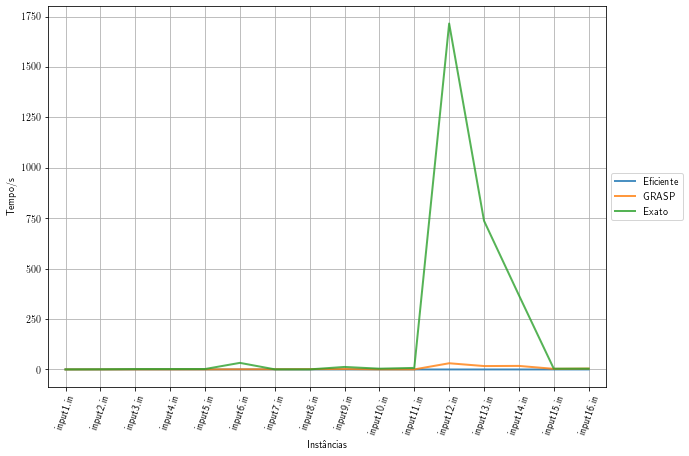

In [61]:
time.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
# plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)